# Classification Of Iris Dataset - Decision Tree

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes=True)

## Step: Loading the Iris Dataset
The Iris dataset is a well-known dataset in the machine learning community. It consists of 150 samples of iris flowers, with 50 samples of each of three different species

In [11]:
# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
print("iris dataset is {}".format(iris.DESCR))
print("iris data size is {}".format(iris.data.shape))

iris dataset is .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each o

## Step. Convert to a Pandas DataFrame

In [17]:
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column if needed
iris_df['target'] = iris.target

# Add Species column using iris.target and target_names
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Remarks
1. `load_iris()` returns a Bunch object, which behaves like a dictionary.
2. `iris.data` contains the feature values (in an array).
3. `iris.feature_names` provides column names for the DataFrame.
4. `iris.target` contains the target labels, which can be added as a column.
5. The Iris dataset in `sklearn` contains only numerical labels (0, 1, 2) in the target column, representing the species. These correspond to the following species:
   1. 0: Setosa
   2. 1: Versicolor
   3. 2: Virginica
6. To add a Species column with the actual species names, you can map the numerical values to their corresponding names using the `target_names` attribute.

In [19]:
iris_df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Data Visualization

### Scatter Plot With SepalLength on X_Axis and SepalWidth on Y_Axis

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

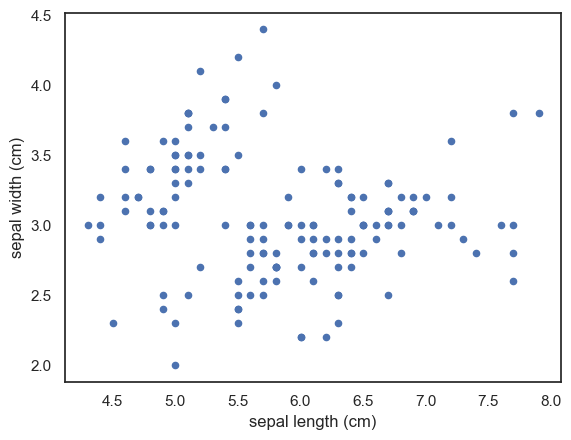

In [21]:
iris_df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

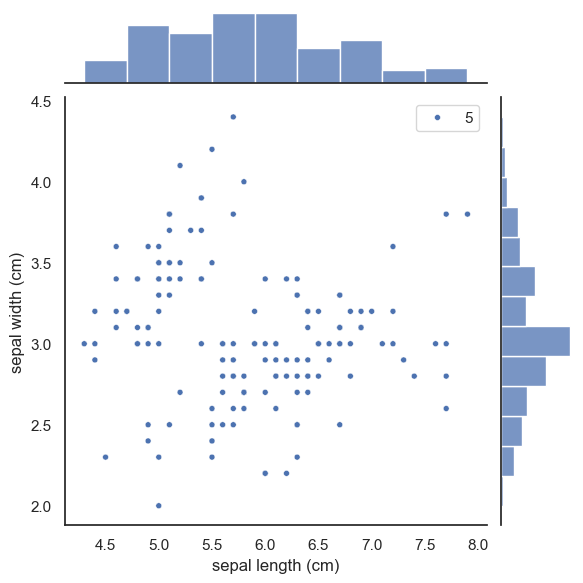

In [22]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df, size=5)

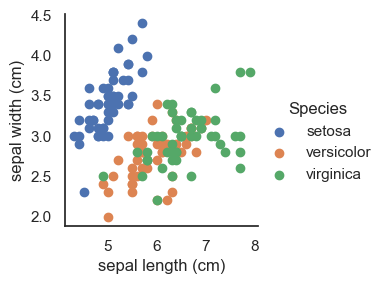

In [25]:
sns.FacetGrid(iris_df, hue="Species") \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

### Box Plot With Species on x-axis and `petal length (cm)` on y-axis

<Axes: xlabel='Species', ylabel='petal length (cm)'>

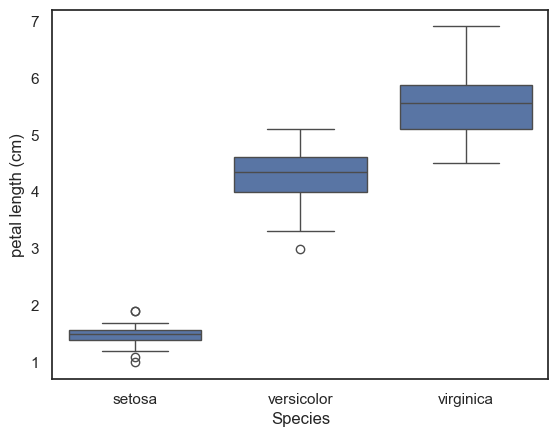

In [26]:
sns.boxplot(x="Species", y="petal length (cm)", data=iris_df)

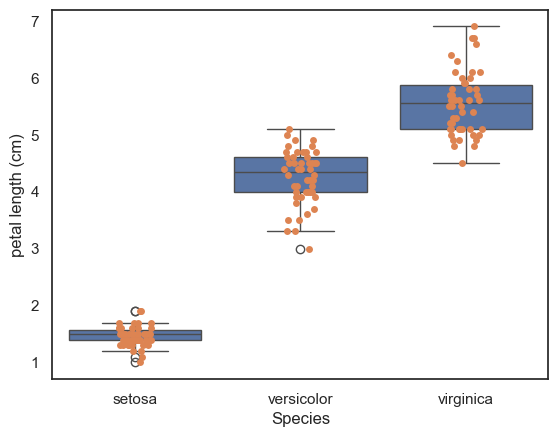

In [28]:
ax = sns.boxplot(x="Species", y="petal length (cm)", data=iris_df)
ax = sns.stripplot(x="Species", y="petal length (cm)", data=iris_df, jitter=True, edgecolor="gray")

### Violin Plot

<Axes: xlabel='Species', ylabel='petal length (cm)'>

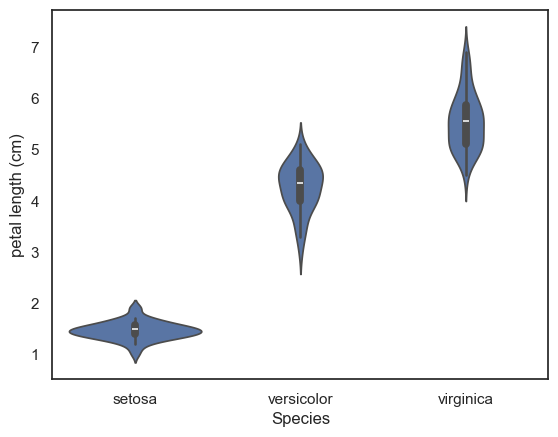

In [31]:
sns.violinplot(x="Species", y="petal length (cm)", data=iris_df)

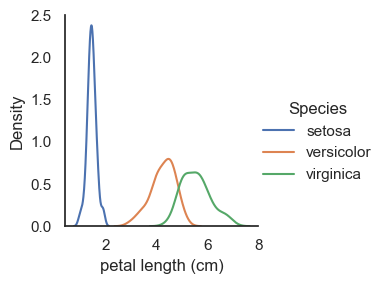

In [33]:
sns.FacetGrid(iris_df, hue="Species") \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()

### Pair Plot

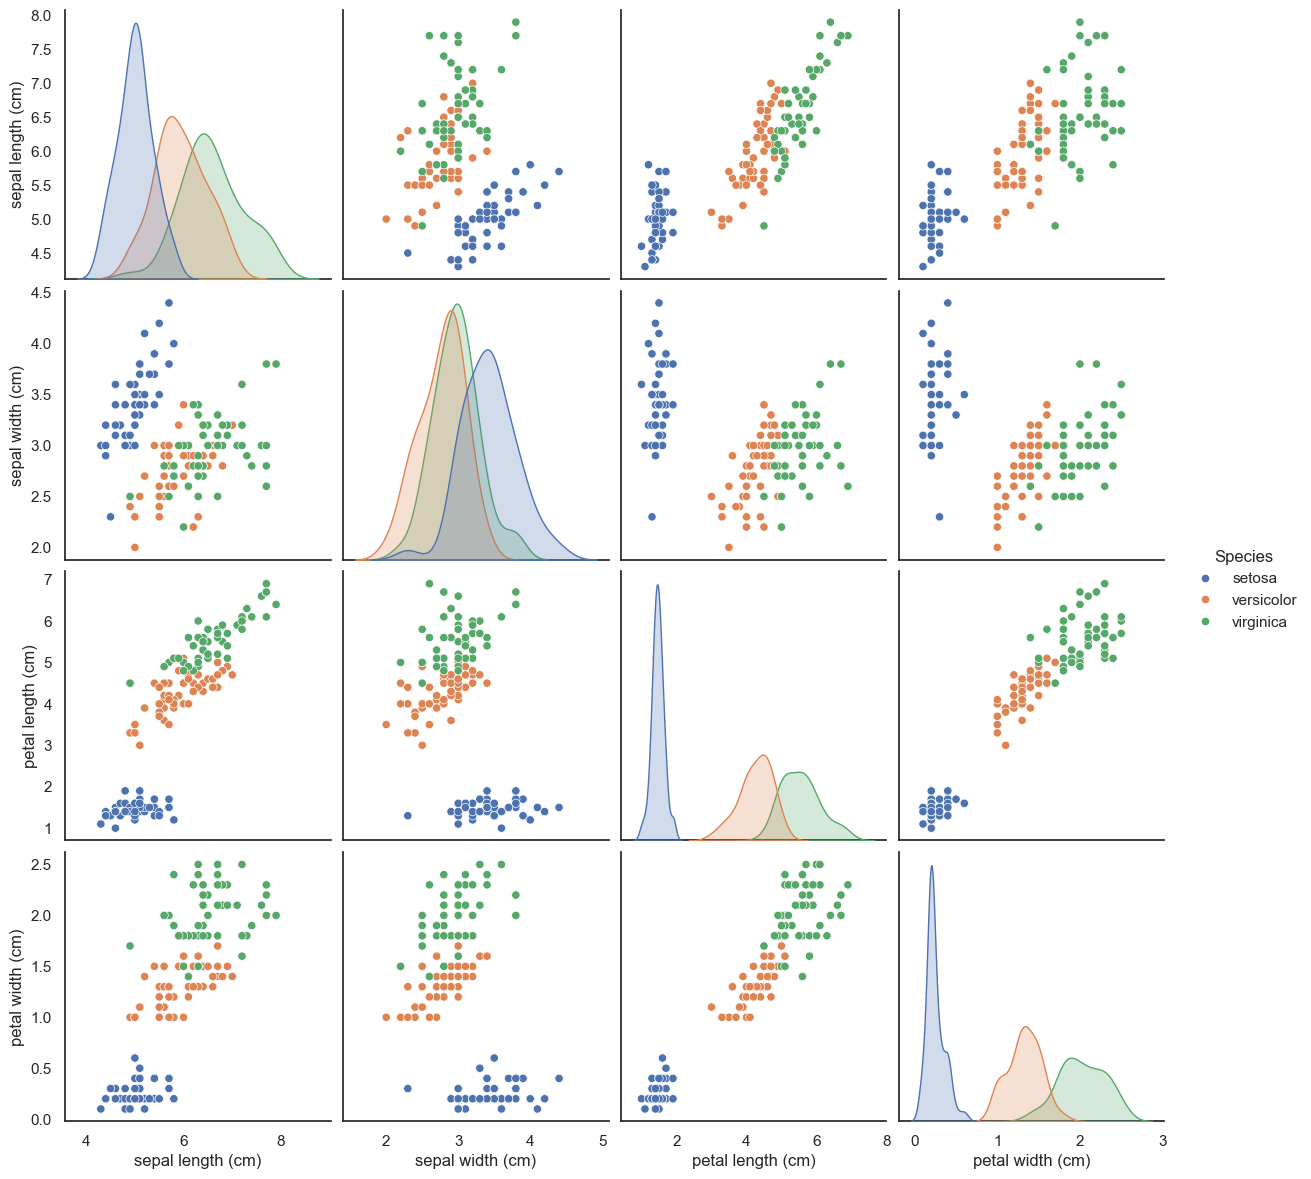

In [36]:
sns.pairplot(iris_df.drop("target", axis=1), hue="Species", size=3)

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[Species]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[Species]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[Species]'>]],
      dtype=object)

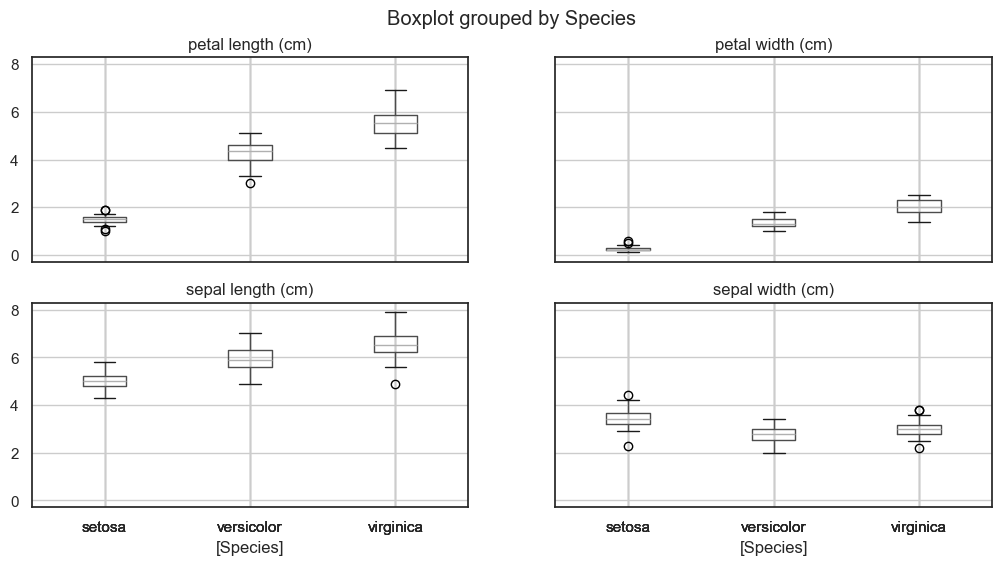

In [37]:
iris_df.drop("target", axis=1).boxplot(by="Species", figsize=(12, 6))

<Axes: >

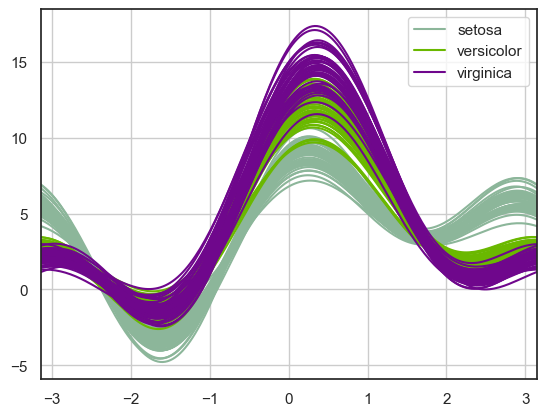

In [38]:
from pandas.plotting import andrews_curves
andrews_curves(iris_df.drop("target", axis=1), "Species")

<Axes: >

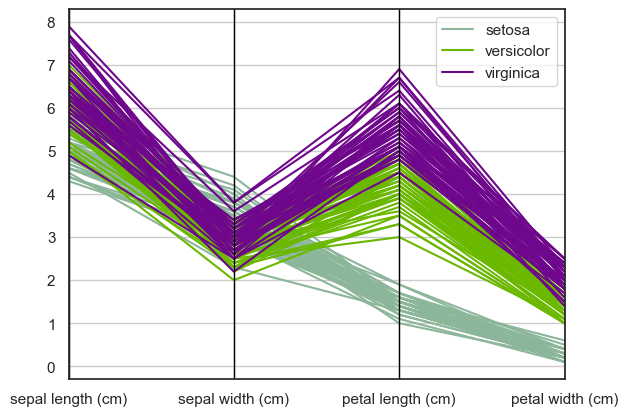

In [39]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_df.drop("target", axis=1), "Species")

<Axes: >

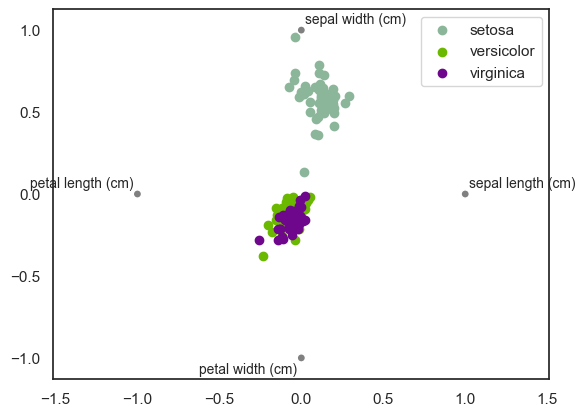

In [40]:
from pandas.plotting import radviz
radviz(iris_df.drop("target", axis=1), "Species")